In [178]:
import numpy as np
import random

from trmf import trmf
from synthetic_data import SyntheticData
from Metrics import ND, NRMSE
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
data = np.load("datasets/traffic.npy").T

In [162]:
data = (data - data.mean().mean()) / data.std()

In [163]:
data.shape

(963, 10560)

In [164]:
T_train = int(data.shape[1]* 90/100)
T_test = data.shape[1] - T_train
T_train,T_test

(9504, 1056)

In [165]:
print("Percentage of missing data = {}%".format(int((np.isnan(data)).sum() / (800*200) * 100)))

Percentage of missing data = 0%


In [166]:
train = data[:,:T_train]
test = data[:, T_train:]

In [167]:
lambda_f = 1.
lambda_x = 1.
lambda_w = 1.
lags = [1, 24]
L = len(lags)
eta = 1.
step = 0.0001
alpha = 1000.
K = 4
model = trmf(lags, K, lambda_f, lambda_x, lambda_w, alpha, eta, max_iter=1000)

In [168]:
model.fit(train)

In [175]:
predictions = model.predict(20)

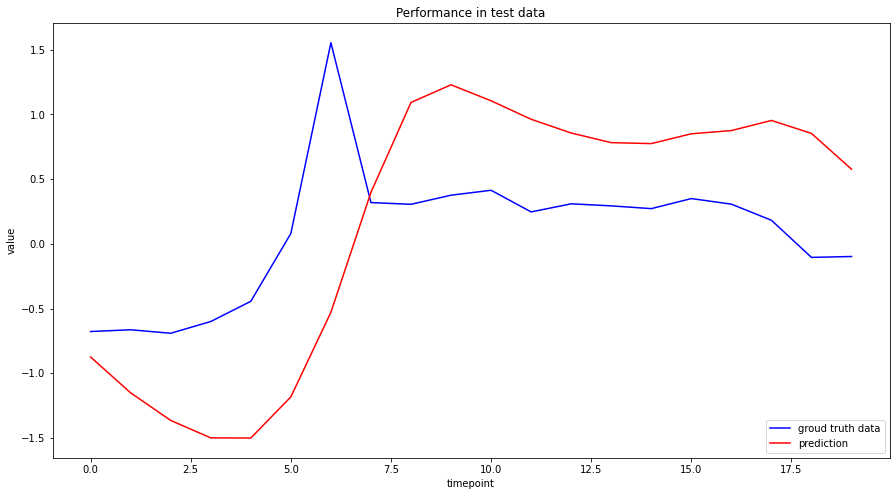

In [176]:
plt.figure(figsize=(15,8))
plt.plot(test[0, :20], label='groud truth data', color='blue')
plt.plot(predictions[0], label='prediction', color='red')

plt.title('Performance in test data')
plt.xlabel('timepoint')
plt.ylabel('value')

plt.legend(loc=4)
plt.show()

In [180]:
NRMSE(predictions, test[:,:20])

1.6929105611157453

In [181]:
ND(predictions, test[:, :20])

1.3189098107385928